# Prosper Loan Data Exploration
## Magalaweng Clive Mmakola

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Index
- <a href='#Preliminary-Wrangling'>Preliminary Wrangling</a>
- <a href='#Univariate-Exploration'>Univariate Exploration</a>
- <a href='#Bivariate-Exploration'>Bivariate Exploration</a>
- <a href='#Multivariate-Exploration'>Multivariate Exploration</a>
- <a href='#Conclusions'>Conclusions</a>

## Preliminary-Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
font = {
    'family': 'DejaVu Sans',
    'color': '#999999',
    'size': 12
}

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# Glimpse of how the data is structured
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Summary information about the data and number of observations
print(loans.shape)
loans.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [5]:
# Select features of interest
mask = [
    'BorrowerAPR','Term', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
    'EmploymentStatusDuration', 'CreditScoreRangeLower','BorrowerRate', 'ProsperScore', 'CreditScoreRangeUpper',
    'IsBorrowerHomeowner','MonthlyLoanPayment','CurrentDelinquencies', 'AmountDelinquent',
    'DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationDate', 'InvestmentFromFriendsCount'
    , 'InvestmentFromFriendsAmount', 'Investors'
]

loans_features = loans[mask]
loans_features.head()

,BorrowerAPR,Term,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,BorrowerRate,ProsperScore,...,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationDate,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0.16516,36,NaN,0,Other,Self-employed,2.0,640.0,0.1580,NaN,...,330.43,2.0,472.0,0.17,"$25,000-49,999",9425,2007-09-12 00:00:00,0,0.0,258
1,0.12016,36,A,2,Professional,Employed,44.0,680.0,0.0920,7.0,...,318.93,0.0,0.0,0.18,"$50,000-74,999",10000,2014-03-03 00:00:00,0,0.0,1
2,0.28269,36,NaN,0,Other,Not available,NaN,480.0,0.2750,NaN,...,123.32,1.0,NaN,0.06,Not displayed,3001,2007-01-17 00:00:00,0,0.0,41
3,0.12528,36,A,16,Skilled Labor,Employed,113.0,800.0,0.0974,9.0,...,321.45,4.0,10056.0,0.15,"$25,000-49,999",10000,2012-11-01 00:00:00,0,0.0,158
4,0.24614,36,D,2,Executive,Employed,44.0,680.0,0.2085,4.0,...,563.97,0.0,0.0,0.26,"$100,000+",15000,2013-09-20 00:00:00,0,0.0,20


In [6]:
# Create a listing category dictionary
listing_cat = {
    0: 'Not Available', 1: 'Debt Consolidation',
    2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
    5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption',
    9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans',
    13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'
}

In [7]:
# Change ListingCategory from numeric to string meanings
# Rename the ListingCategory (numeric) to ListingCategory
loans_features.replace(to_replace={'ListingCategory (numeric)': listing_cat}, inplace=True)
loans_features.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [8]:
# See Changes
loans_features.head()

,BorrowerAPR,Term,ProsperRating (Alpha),ListingCategory,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,BorrowerRate,ProsperScore,...,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationDate,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0.16516,36,NaN,Not Available,Other,Self-employed,2.0,640.0,0.1580,NaN,...,330.43,2.0,472.0,0.17,"$25,000-49,999",9425,2007-09-12 00:00:00,0,0.0,258
1,0.12016,36,A,Home Improvement,Professional,Employed,44.0,680.0,0.0920,7.0,...,318.93,0.0,0.0,0.18,"$50,000-74,999",10000,2014-03-03 00:00:00,0,0.0,1
2,0.28269,36,NaN,Not Available,Other,Not available,NaN,480.0,0.2750,NaN,...,123.32,1.0,NaN,0.06,Not displayed,3001,2007-01-17 00:00:00,0,0.0,41
3,0.12528,36,A,Motorcycle,Skilled Labor,Employed,113.0,800.0,0.0974,9.0,...,321.45,4.0,10056.0,0.15,"$25,000-49,999",10000,2012-11-01 00:00:00,0,0.0,158
4,0.24614,36,D,Home Improvement,Executive,Employed,44.0,680.0,0.2085,4.0,...,563.97,0.0,0.0,0.26,"$100,000+",15000,2013-09-20 00:00:00,0,0.0,20


In [9]:
# Check rate of missing values
loans_features.isnull().sum() / len(loans_features)

BorrowerAPR                    0.000219
Term                           0.000000
ProsperRating (Alpha)          0.255264
ListingCategory                0.000000
Occupation                     0.031491
EmploymentStatus               0.019792
EmploymentStatusDuration       0.066923
CreditScoreRangeLower          0.005187
BorrowerRate                   0.000000
ProsperScore                   0.255264
CreditScoreRangeUpper          0.005187
IsBorrowerHomeowner            0.000000
MonthlyLoanPayment             0.000000
CurrentDelinquencies           0.006117
AmountDelinquent               0.066897
DebtToIncomeRatio              0.075077
IncomeRange                    0.000000
LoanOriginalAmount             0.000000
LoanOriginationDate            0.000000
InvestmentFromFriendsCount     0.000000
InvestmentFromFriendsAmount    0.000000
Investors                      0.000000
dtype: float64

In [10]:
# Short summary of data
loans_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BorrowerAPR                  113912 non-null  float64
 1   Term                         113937 non-null  int64  
 2   ProsperRating (Alpha)        84853 non-null   object 
 3   ListingCategory              113937 non-null  object 
 4   Occupation                   110349 non-null  object 
 5   EmploymentStatus             111682 non-null  object 
 6   EmploymentStatusDuration     106312 non-null  float64
 7   CreditScoreRangeLower        113346 non-null  float64
 8   BorrowerRate                 113937 non-null  float64
 9   ProsperScore                 84853 non-null   float64
 10  CreditScoreRangeUpper        113346 non-null  float64
 11  IsBorrowerHomeowner          113937 non-null  bool   
 12  MonthlyLoanPayment           113937 non-null  float64
 13 

In [11]:
# Change Loan Original date to a date time object
loans_features['LoanOriginationDate'] = pd.to_datetime(loans_features['LoanOriginationDate'])

### Dataset Structure

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### Main feature(s) of interest

- BorrowerAPR
- BorrowerRate


### Features in the dataset that will help support investigation into feature(s) of interest

- BorrowerAPR
- Term
- ProsperRating (Alpha)
- ListingCategory (numeric)
- Occupation 
- EmploymentStatus
- EmploymentStatusDuration
- CreditScoreRangeLower
- BorrowerRate
- ProsperScore
- CreditScoreRangeUpper
- IsBorrowerHomeowner
- MonthlyLoanPayment
- Investors
- CurrentDelinquencies
- AmountDelinquent
- DebtToIncomeRatio
- IncomeRange
- LoanOriginalAmount
- LoanOriginationDate
- InvestmentFromFriendsCount
- InvestmentFromFriendsAmount
- Investors

## Univariate Exploration

In [12]:
# Short summary statistics of the data
loans_features.describe()

,BorrowerAPR,Term,EmploymentStatusDuration,CreditScoreRangeLower,BorrowerRate,ProsperScore,CreditScoreRangeUpper,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113912.000000,113937.000000,106312.000000,113346.000000,113937.000000,84853.000000,113346.000000,113937.000000,113240.000000,106315.000000,105383.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,0.218828,40.830248,96.071582,685.567731,0.192764,5.950067,704.567731,272.475783,0.592052,984.507059,0.275947,8337.01385,0.023460,16.550751,80.475228
std,0.080364,10.436212,94.480605,66.458275,0.074818,2.376501,66.458275,192.697812,1.978707,7158.270157,0.551759,6245.80058,0.232412,294.545422,103.239020
min,0.006530,12.000000,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1000.00000,0.000000,0.000000,1.000000
25%,0.156290,36.000000,26.000000,660.000000,0.134000,4.000000,679.000000,131.620000,0.000000,0.000000,0.140000,4000.00000,0.000000,0.000000,2.000000
50%,0.209760,36.000000,67.000000,680.000000,0.184000,6.000000,699.000000,217.740000,0.000000,0.000000,0.220000,6500.00000,0.000000,0.000000,44.000000
75%,0.283810,36.000000,137.000000,720.000000,0.250000,8.000000,739.000000,371.580000,0.000000,0.000000,0.320000,12000.00000,0.000000,0.000000,115.000000
max,0.512290,60.000000,755.000000,880.000000,0.497500,11.000000,899.000000,2251.510000,83.000000,463881.000000,10.010000,35000.00000,33.000000,25000.000000,1189.000000


In [13]:
# Short info about data
loans_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   BorrowerAPR                  113912 non-null  float64       
 1   Term                         113937 non-null  int64         
 2   ProsperRating (Alpha)        84853 non-null   object        
 3   ListingCategory              113937 non-null  object        
 4   Occupation                   110349 non-null  object        
 5   EmploymentStatus             111682 non-null  object        
 6   EmploymentStatusDuration     106312 non-null  float64       
 7   CreditScoreRangeLower        113346 non-null  float64       
 8   BorrowerRate                 113937 non-null  float64       
 9   ProsperScore                 84853 non-null   float64       
 10  CreditScoreRangeUpper        113346 non-null  float64       
 11  IsBorrowerHomeowner       

In [14]:
def barPlot(data, locs, labels_list, bar_title, x_label, y_label):
    '''Helps plot a vertical bar chart
    
       Arguments
       ---------
       data: Pandas Series of proportions or counts
       locs: A list of integers where the bars will be located
       labels_list: A list of string type labels for the x-axis ticks
       bar_title: A string type descriptive title for the plot
       x_label: A string type label for the x-axis
       y_label: A string type label for the y-axis
       
       Returns
       -------
       A vertical bar plot of the data
    '''
    plt.bar(locs, data, tick_label=labels_list)# Plot vertical bars with matplotlib
    plt.title(bar_title, fontdict=font)# Set plot title
    plt.xlabel(x_label, fontdict=font)# Set plot x-axis label
    plt.ylabel(y_label, fontdict=font)# Set plot y-axis label

In [15]:
def barhPlot(data, locs, labels_list, bar_title, x_label, y_label):
    '''Helps plot a horizontal bar chart
    
       Arguments
       ---------
       data: Pandas Series of proportions or counts
       locs: A list of integers where the bars will be located
       label_list: A list of string type labels for the x-axis ticks
       bar_title: A string type descriptive title for the plot
       x_label: A string type label for the x-axis
       y_label: A string type label for the y-axis
       
       Returns
       -------
       A horizontal bar plot of the data
    '''
    plt.barh(locs, data, tick_label=labels_list)# Plot horizontal bars with matplotlib
    plt.title(bar_title, fontdict=font)# Set plot title
    plt.xlabel(x_label, fontdict=font)# Set x-axis label
    plt.ylabel(y_label, fontdict=font)# Set y-axis label

### Which loan term is mostly favoured by borrowers?

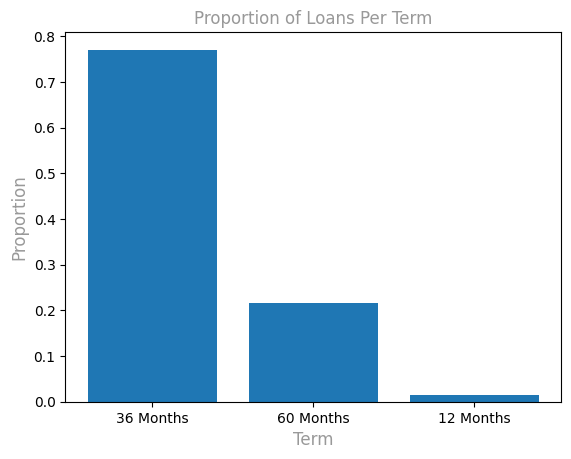

In [16]:
# Plot Term bar chart
heights = loans_features.Term.value_counts(normalize=True)# Get Term value counts
locations = np.arange(0, loans_features.Term.nunique())# Set locations for each bar
labels = ['36 Months', '60 Months', '12 Months']
terms_title = 'Proportion of Loans Per Term'
barPlot(heights, locations, labels, terms_title, 'Term', 'Proportion')

### Observations

#### Proportion of loans per term

- From this bar plot we see that the 36 months term loans were favoured the most and the least favoured loan term being the 12 months term

### What Prosper scores mostly attract lenders?

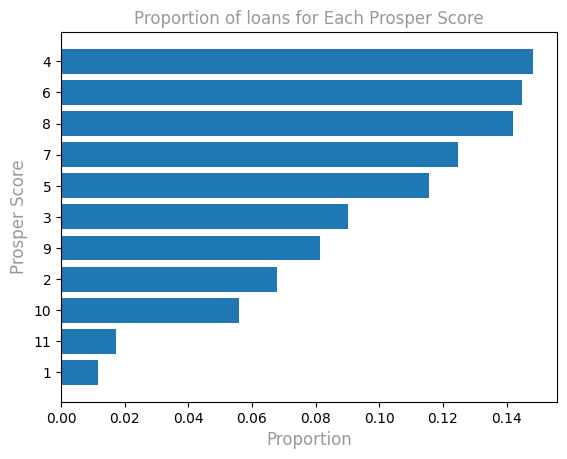

In [17]:
vert_heights = loans_features.ProsperScore.value_counts(normalize=True, ascending=True)# Get Prosper score value counts
locations = np.arange(0, loans_features.ProsperScore.nunique())
labels = [f'{int(value)}' for value in vert_heights.index]
barhPlot(vert_heights, locations, labels, 'Proportion of loans for Each Prosper Score',
         'Proportion', 'Prosper Score')

### Observations

#### Proportion of loans for Each Prosper Score

- From this bar plot we see borrowers with a prosper score of 4 took out most loans, these borrowers make up about over 14% of the data and those with a score of 1 did not take many loans, these borrowers make up about less than 2% of he data, which makes sense since a score of 1 and the reason they do not have many listed loans might be because the score is of risky loans


### What income range do borrowers with most listed loans fall in?

In [18]:
ranges = ["$0", "$1-24,999", "$25,000-49,999",
          "$50,000-74,999", "$75,000-99,999",
           "$100,000+"]
levels = pd.api.types.CategoricalDtype(categories=ranges,
         ordered = True)
loans_features['IncomeRange'] = loans_features['IncomeRange'].astype(levels)

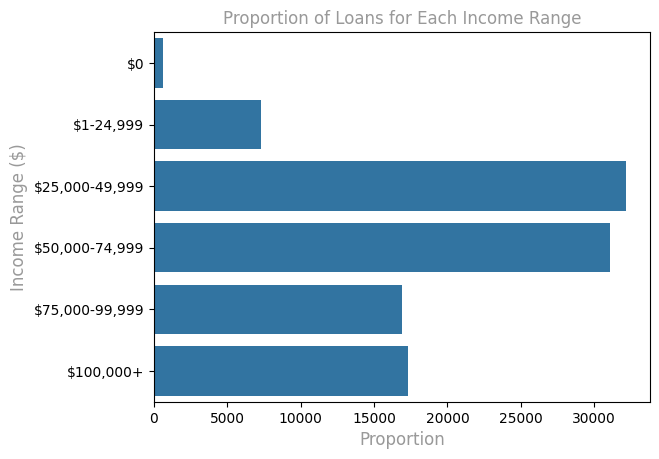

In [19]:
color = sb.color_palette()[0]
order = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
sb.countplot(data=loans_features, y='IncomeRange', color=color, order=order)
plt.title('Proportion of Loans for Each Income Range', fontdict=font)
plt.xlabel('Proportion', fontdict=font)
plt.ylabel('Income Range ($)', fontdict=font);

### Observations

#### Proportion of Loans for Each Income Range

- Weirdly enought there were unemployed borrowers with listed loans and those who have 0 Dollars earnings, in total the `Not Employed` borrowers make up less than 2% of the data and those with zero earnings. We see that those in the `25_000 - 49_999` income range took out most loans making up just above 25% of the data followed by those in the `50_000 - 74_999` income range.


In [20]:
def hist_plot(data, x_values, plot_title,x_label, y_label, bins):
    '''Helps plot a histogram
    
       Arguments
       ---------
       data: Pandas Dataframe
       x_values: Input values,this takes either a single array or a sequence of arrays which are not 
                 required to be of the same length
       plot_title: A string type(text) descriptive title for the plot
       x_label: A string type(text) label for the x-axis
       y_label: A string type(text) label for the y-axis
       bins: int or sequence or str
             If bins is an integer, it defines the number of equal-width bins in the range
             If bins is a sequence, it defines the bin edges,
             including the left edge of the first bin and the right edge of the last bin
       
       Returns
       -------
       A vertical bar plot of the data
    '''
    plt.hist(data=data, x=x_values, bins=bins)# Plot histogram with matplotlib
    plt.title(plot_title, fontdict=font)# Set plot title
    plt.xlabel(x_label, fontdict=font)# Set plot x-axis label
    plt.ylabel(y_label, fontdict=font)# Set plot y-axis label

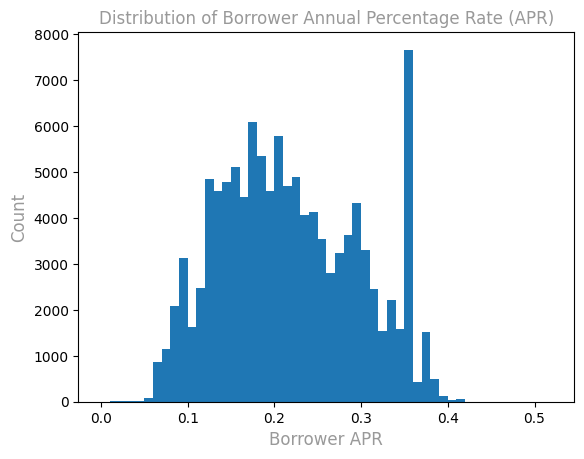

In [21]:
bins = np.arange(0, loans_features.BorrowerAPR.max()+0.01, 0.01)# Set bins
hist_plot(loans_features, 'BorrowerAPR', 'Distribution of Borrower Annual Percentage Rate (APR)',
          'Borrower APR', 'Count', bins)

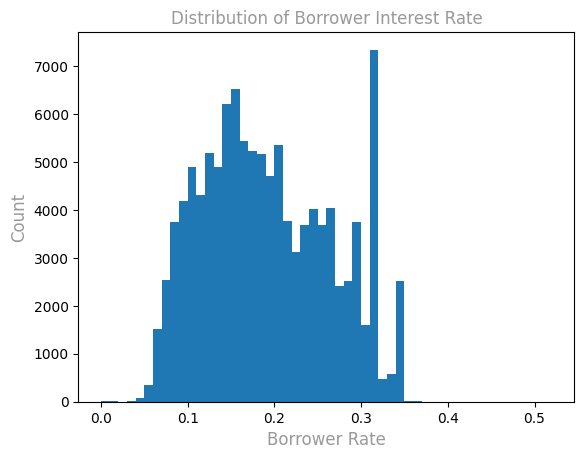

In [22]:
bins = np.arange(0, loans_features.BorrowerAPR.max()+0.01, 0.01)
hist_plot(loans_features, 'BorrowerRate', 'Distribution of Borrower Interest Rate',
          'Borrower Rate', 'Count', bins)

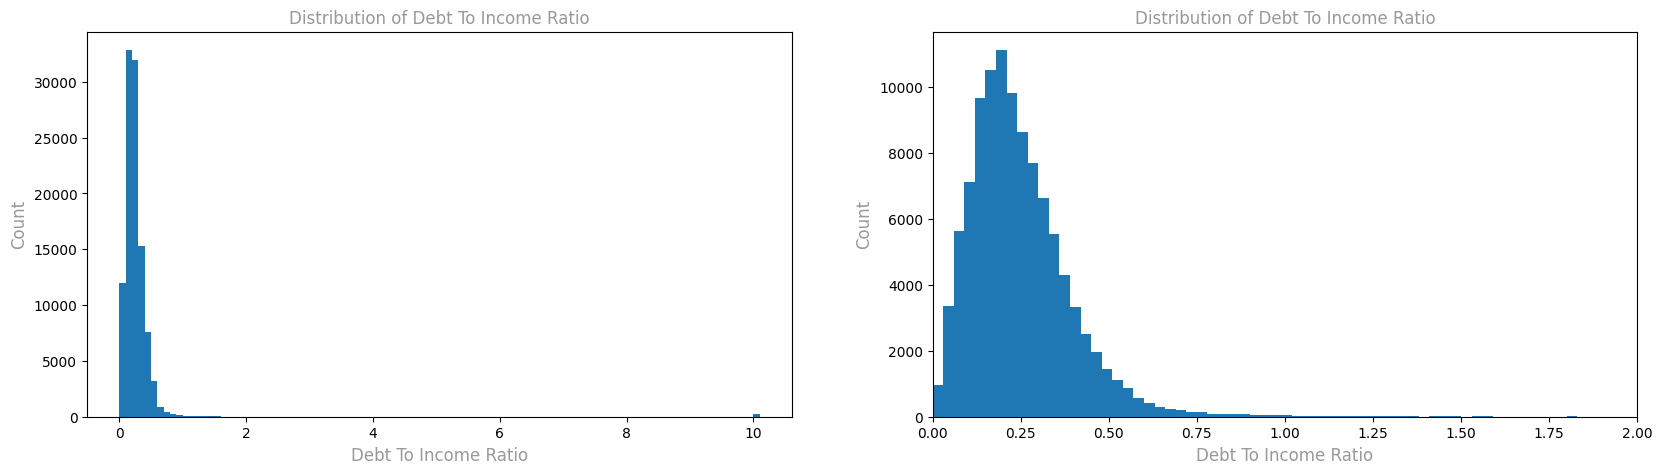

In [23]:
# Distribution of Debt to income ratio
plt.figure(figsize=[20, 5])# Set plot size
plt.subplot(1, 2, 1)# Plot the first histogram in the first position
bins = np.arange(0, loans_features.DebtToIncomeRatio.max()+0.1, 0.1)
hist_plot(loans_features, 'DebtToIncomeRatio', 'Distribution of Debt To Income Ratio',
          'Debt To Income Ratio', 'Count', bins)

plt.subplot(1, 2, 2)# Plot second histogram in the second postition
bins = np.arange(0, loans_features.DebtToIncomeRatio.max()+0.03, 0.03)
hist_plot(loans_features, 'DebtToIncomeRatio', 'Distribution of Debt To Income Ratio',
          'Debt To Income Ratio', 'Count', bins)
plt.xlim(0, 2);# Limit x-axis values to the values that are not outliers

#### Distribution of Borrower Annual Percentage Rate (APR)

- We have a bimodal distribution of borrower annual percentage rate with a high peak in the 0.3 to 0.4 range

####  Distribution of Borrower Rate

- We have a bimodal distribution of the borrower rate with a high peak in the 0.3 to 0.4 range

###  unusual distributions

- We have a highly right skewed distribution of the `DebtToIncomeRatio`, deserves more investigation.



## Bivariate-Exploration

In [24]:
# Function to plot countplots
def countPlot(data, x_values, hue_col, count_title, x_label, y_label):
    '''Helps plot a histogram
    
       Arguments
       ---------
       data: DataFrame, array, or list of arrays
       x_values: x_co-ordinates to plot
       hue_col: column of values for clustering
       plot_title: A string type(text) descriptive title for the plot
       x_label: A string type(text) label for the x-axis
       y_label: A string type(text) label for the y-axis
       bins: int or sequence or str
             If bins is an integer, it defines the number of equal-width bins in the range
             If bins is a sequence, it defines the bin edges,
             including the left edge of the first bin and the right edge of the last bin
       
       Returns
       -------
       A vertical bar plot of the data
    '''
    sb.countplot(data=data, x=x_values, hue=hue_col, palette='viridis_r')# Plot a count plot using seaborn
    plt.title(count_title, fontdict=font)# Set plot title
    plt.xlabel(x_label, fontdict=font)# Set x-axis label
    plt.ylabel(y_label, fontdict=font)# Set y-axis label

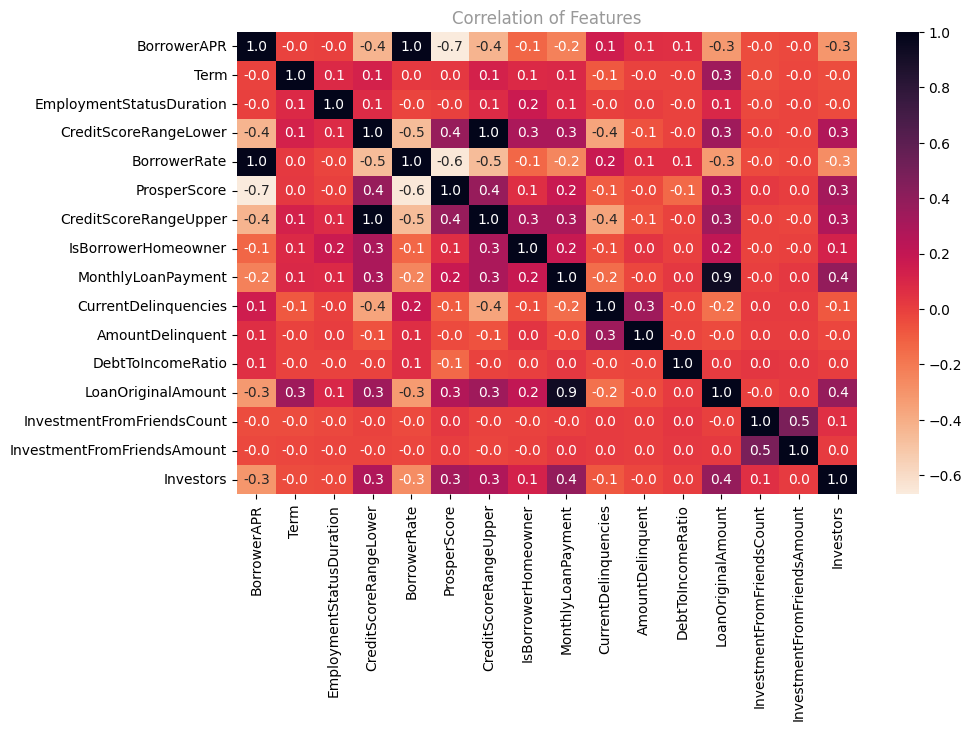

In [25]:
plt.figure(figsize=[10, 6])# Set plot size
loans_corr = loans_features.corr()# Get correlation between features
sb.heatmap(loans_corr, cmap='rocket_r', annot=True, fmt='0.1f')# Plot heatmap using seaborn
plt.title('Correlation of Features', fontdict=font);# Set plot title

### Observations

#### Correlation of Features

- Strong linear relationships between `BorrowerAPR` and `BorrowerRate` and again between `CreditScoreRangeLower` `CreditScoreRangeUpper` are cemented by the high correlation, having a Pearson correlation value of 1
- `LoanOriginalAmount` and `MonthlyLoanPayment` have a Pearson correlation value of 0.9, very close to 1

### Does being a homeowner have any effect on the loan one takes?

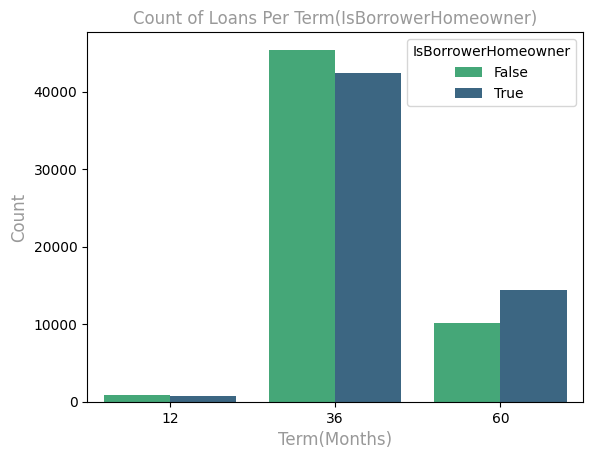

In [26]:
# Check favoured loan term by Borrowers who are homeowners
IBH_title = 'Count of Loans Per Term(IsBorrowerHomeowner)'
countPlot(loans_features, 'Term', 'IsBorrowerHomeowner', IBH_title, 'Term(Months)', 'Count')

### Observations

#### Count of Loans Per Term(IsBorrowerHomeowner)

- Borrowers took out most of the loans with a 36 months term, with those who are not homeowners taking out more loans than those who are homeowners.
- Borrowers who took out loans with a 60 months loan term were significanltly lower than those of a 36 months term but this time around with homeowners taking out more loans than those who are not homeowners.
- The 12 months loan term is still the highly unfavoured loan term

### What other factors affect a borrower taking a loan?

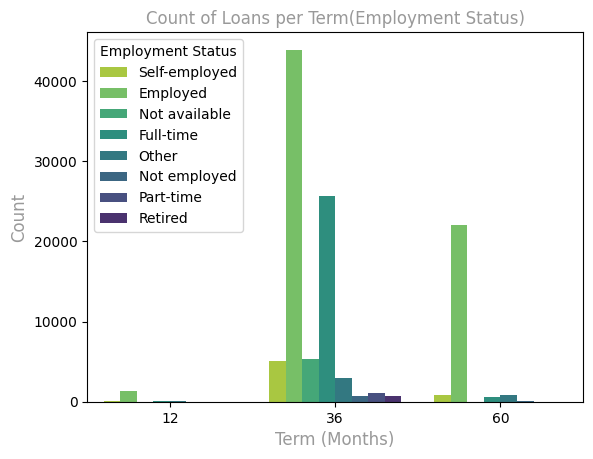

In [27]:
ES_title = 'Count of Loans per Term(Employment Status)'
countPlot(loans_features, 'Term', 'EmploymentStatus', ES_title, 'Term (Months)', 'Count')
plt.legend(title='Employment Status');# Set legend title

### Observations

#### Count of Loans per Term(Employment Status)

- Employed borrowers took out more loans than every other borrower with over 40000 listed loans in the 36 months loan term category and again the highest in the 12 and 60 monhts loan terms. The fact that these borrowers are employed might be that reason why they have more listed loans since they are less likely to default since they have guranteed income.

### Does rating play a role in a borrower being apporved for a loan?

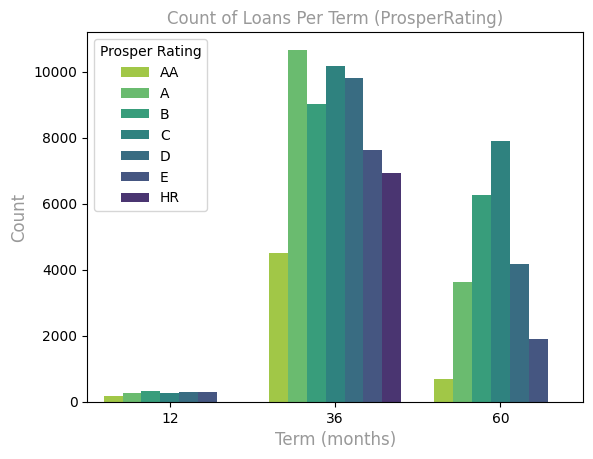

In [28]:
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data=loans_features, x='Term', hue='ProsperRating (Alpha)', hue_order=order, palette='viridis_r')
plt.title( 'Count of Loans Per Term (ProsperRating)', fontdict=font)
plt.xlabel('Term (months)', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.legend(title='Prosper Rating');

### Observations

#### Count of Loans Per Term (ProsperRating)

- AA is the high rating and HR the worst rating. 
- Most loans in the 36 months loan term were taken out by borrowers with a Prosper rating of class A followed by those of class C and those of class AA having the least amount of loans.
- Most loans in the 60 months term were taken out by borrowers with a Prosper rating of class C followed by those of class B and those of class AA having the least amount of loans
- The 12 months loan term remains the least favoured loan term by all classes

### What is the ralationship between all numerical features?

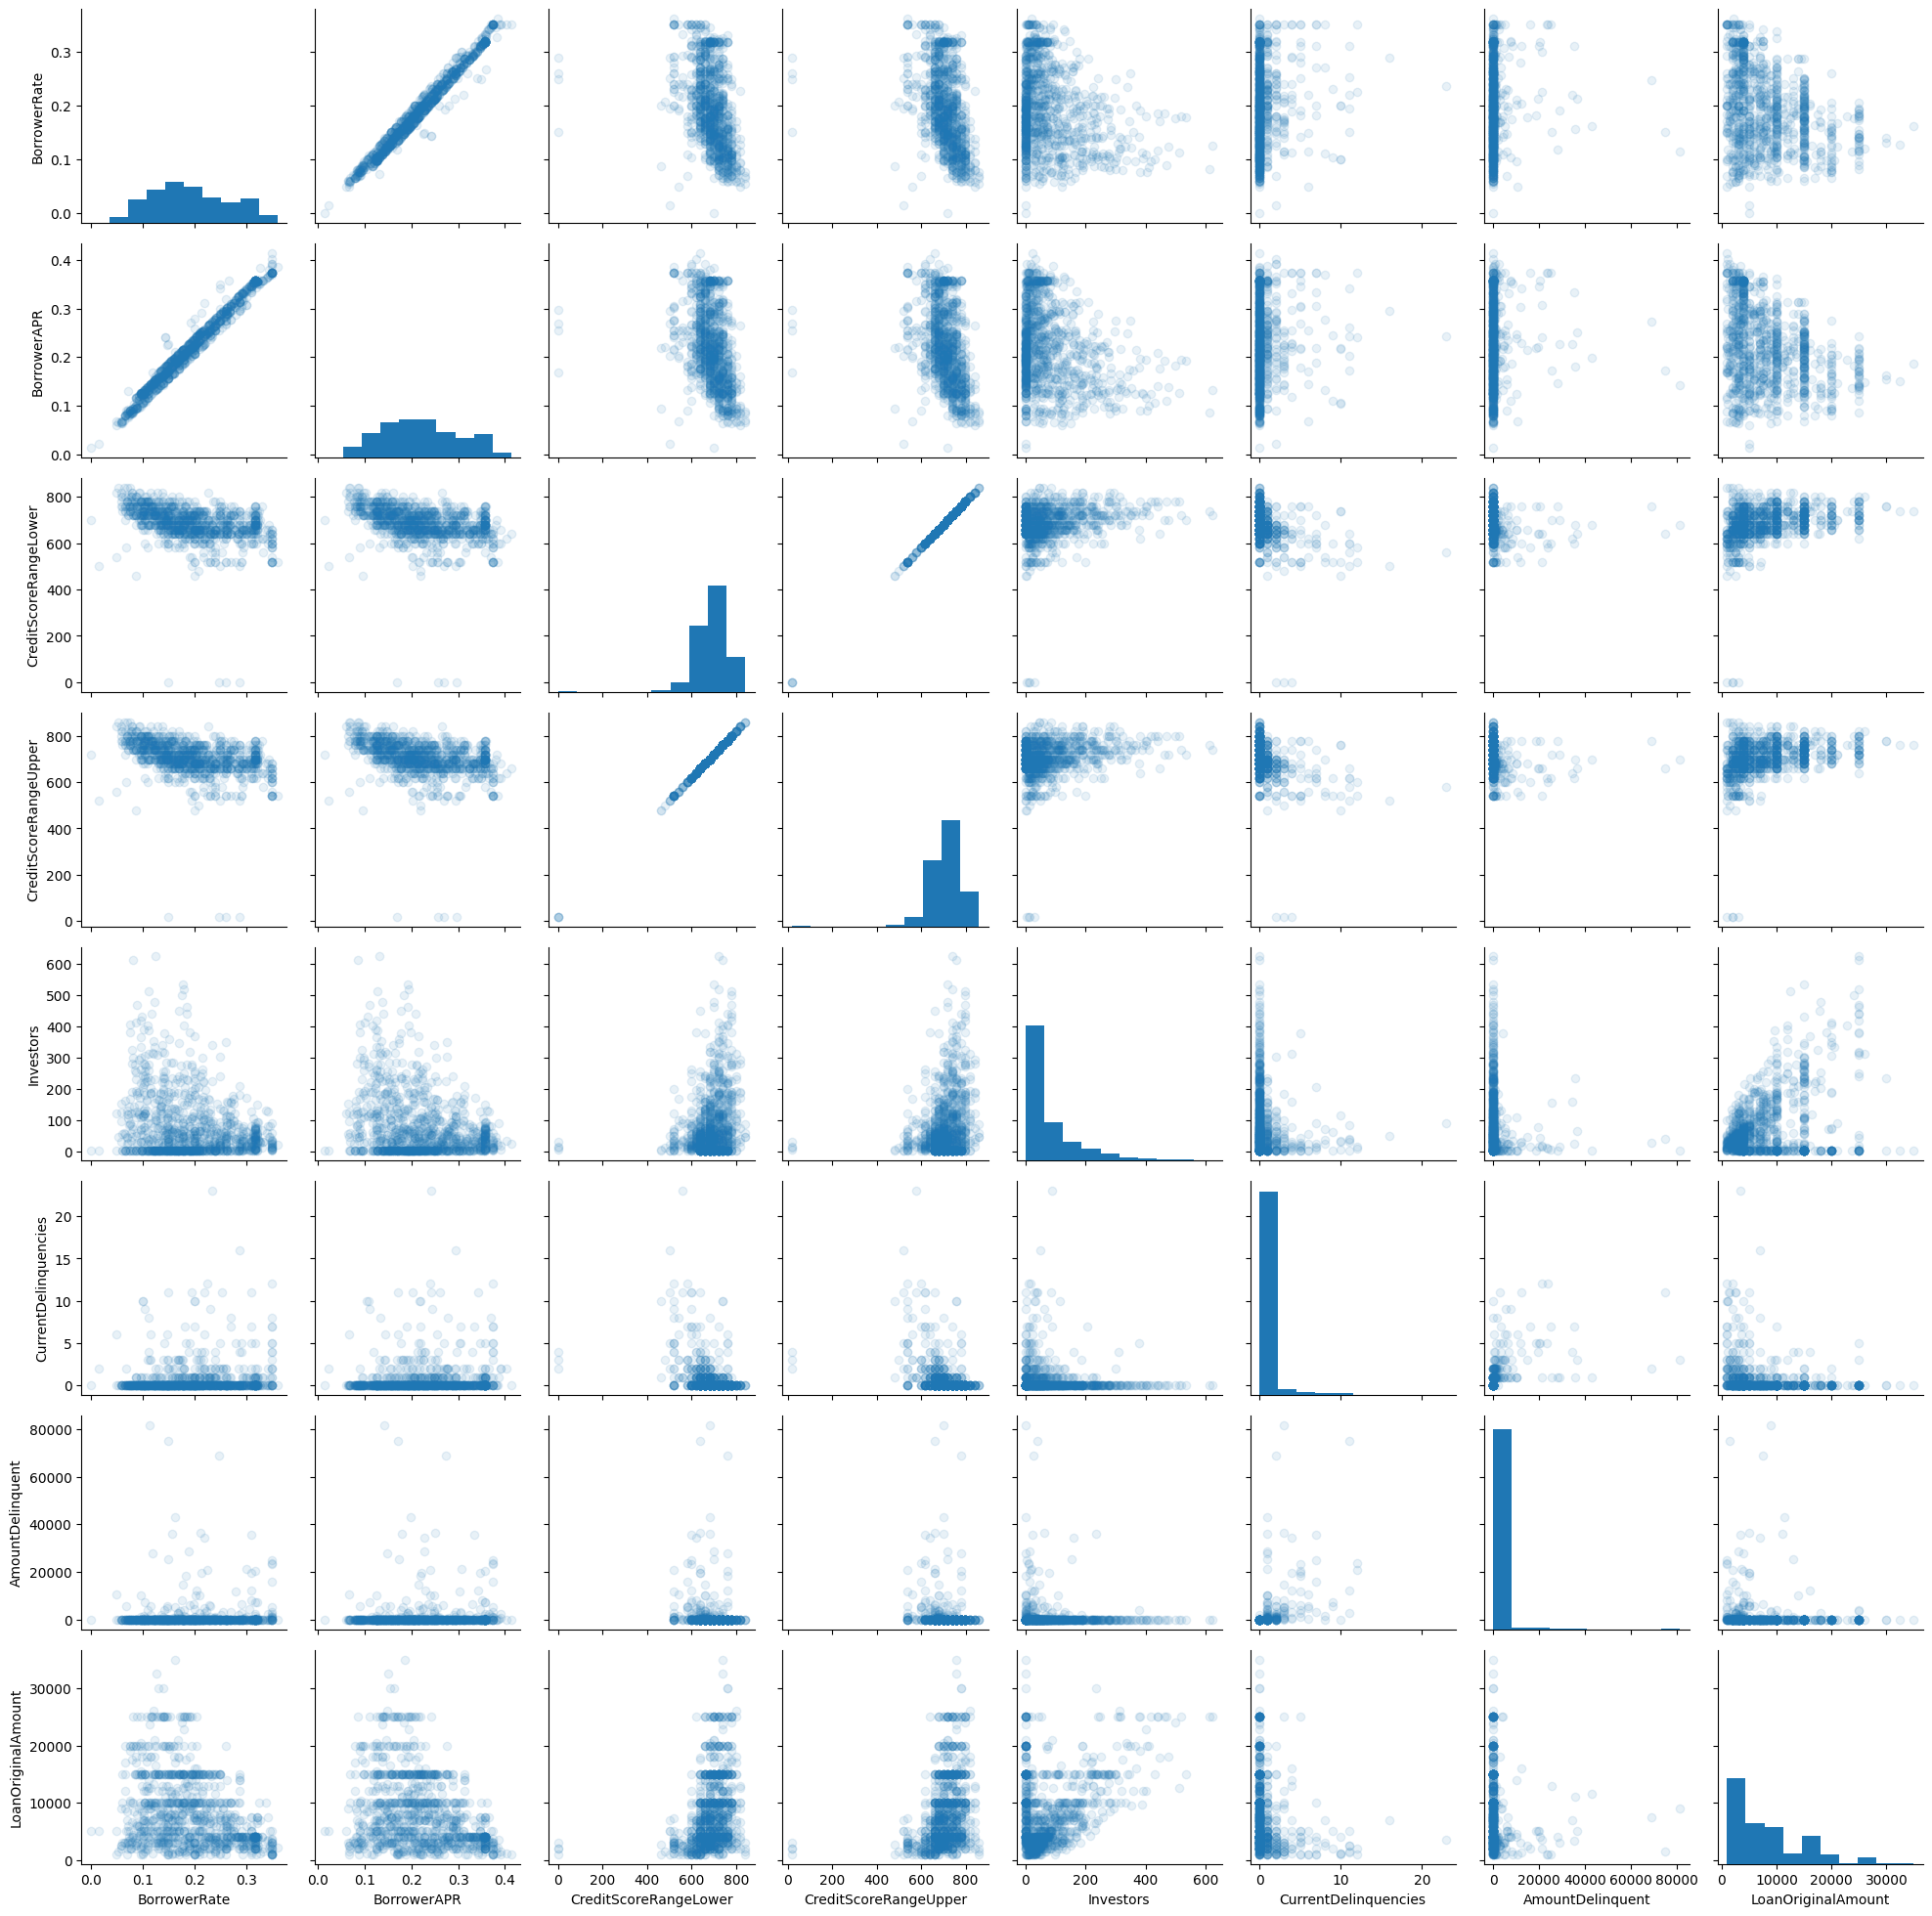

In [29]:
loan_stats = ['BorrowerRate', 'BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
              'Investors', 'CurrentDelinquencies', 'AmountDelinquent', 'LoanOriginalAmount']
g = sb.PairGrid(data=loans.sample(1000), vars=loan_stats)
g.map_offdiag(sb.regplot, scatter_kws={'alpha': 1/10}, fit_reg=False)
g.map_diag(plt.hist);

### Observations

- In the pair grid there are strong linear relationships between `BorrowerAPR vs BorrowerRate` and again between `CreditScoreRangeLower vs CreditScoreRangeUpper` with lower range outliers.
- `LoanOriginalAmount` has a highly right skewed distribution and both `CreditScoreRangeLower` `CreditScoreRangeUpper` have highly left skewed distributions


## Multivariate-Exploration

### Does being a homeowner affect the borrower rate?

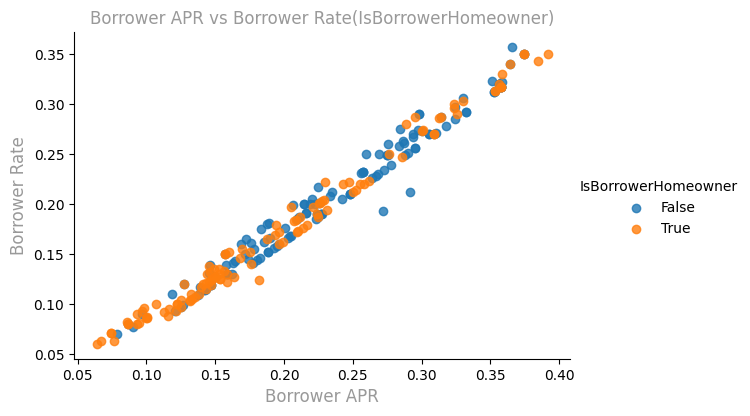

In [30]:
# A plot of Borrower Rate vs Borrower APR depending on wether borrower is a homeowner
# or not
loans_features_sample = loans_features.sample(250)
g = sb.FacetGrid(data=loans_features_sample, hue='IsBorrowerHomeowner',
                 height=4, aspect=1.5)
g.map(sb.regplot, 'BorrowerAPR', 'BorrowerRate',
     fit_reg=False)
g.add_legend()
plt.title('Borrower APR vs Borrower Rate(IsBorrowerHomeowner)', fontdict=font)
plt.xlabel('Borrower APR', fontdict=font)
plt.ylabel('Borrower Rate', fontdict=font);

### Does being a homeowner affect the loan payment and loan amount?

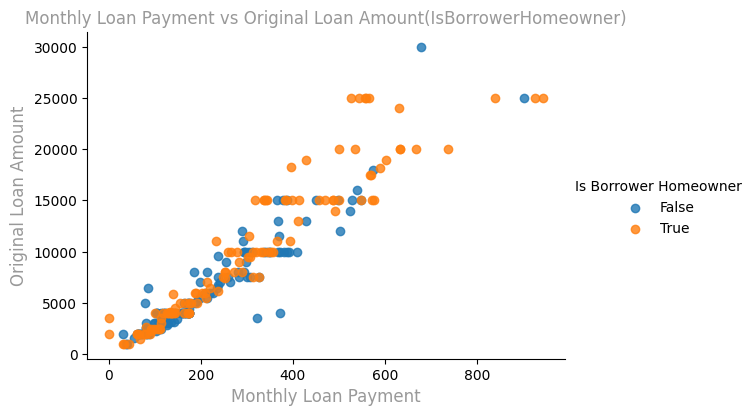

In [31]:
# A plot of Monthly loan payment vs Original loan amount depending on wether borrower
# is a home owner or not
g = sb.FacetGrid(data=loans_features_sample, hue='IsBorrowerHomeowner',
                 height=4, aspect=1.5)
g.map(sb.regplot, 'MonthlyLoanPayment', 'LoanOriginalAmount',
     fit_reg=False)
plt.xlabel('Monthly Loan Payment', fontdict=font)
plt.ylabel('Original Loan Amount', fontdict=font)
g.add_legend(title='Is Borrower Homeowner')
plt.title('Monthly Loan Payment vs Original Loan Amount(IsBorrowerHomeowner)',
          fontdict=font);

### Observations

#### Monthly Loan Payment vs Original Loan Amount(IsBorrowerHomeowner) and Borrower APR vs Borrower Rate(IsBorrowerHomeowner)

- Used a sample of 250 data points to avoid overplotting
- There is a strong linear relationship between `BorrowerRate` and `BorrowerAPR`
- There is a weak linear relationship between `MonthlyLoanPayment` and `LoanOriginalAmount` and the distribution of points of borrower being a home owner or not is nicely distributed between the two categories

### What effects do rates have on loan amount and loan payment?

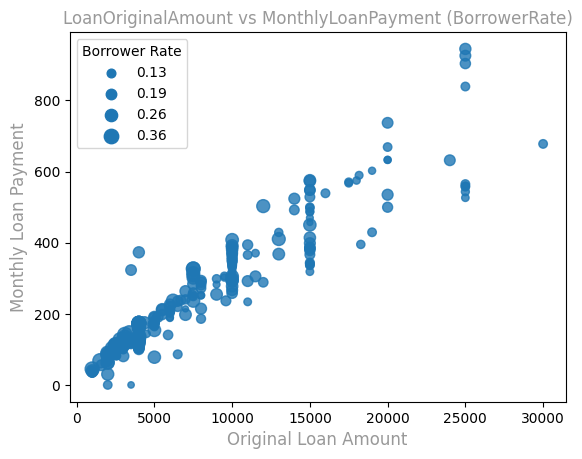

In [32]:
sb.regplot(data=loans_features_sample, x='LoanOriginalAmount', y='MonthlyLoanPayment', fit_reg=False,
            scatter_kws={'s': loans_features_sample['BorrowerRate'] * 300})
sizes = [round(i, 2) for i in loans_features_sample.BorrowerRate.describe().loc['25%':'max']]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s*300, color=base_color))
    
plt.legend(legend_obj, sizes, title='Borrower Rate')
plt.title('LoanOriginalAmount vs MonthlyLoanPayment (BorrowerRate)', fontdict=font)
plt.xlabel('Original Loan Amount', fontdict=font)
plt.ylabel('Monthly Loan Payment', fontdict=font);

### Observations

#### LoanOriginalAmount vs MonthlyLoanPayment (BorrowerRate)

- There seems to be an increase in Borrower Rate where there is an increase in monthly loan payment or original loan amount and sometimes when both are in high ranges


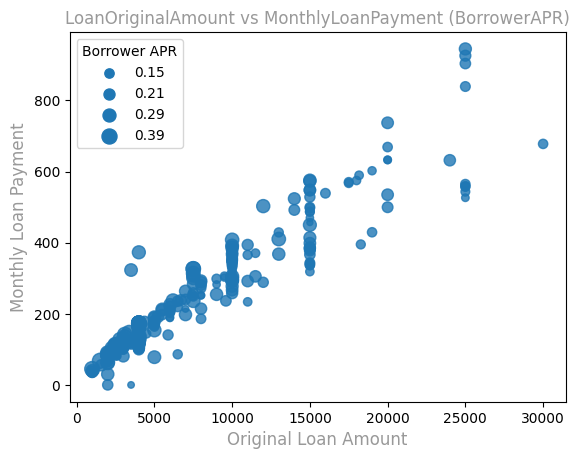

In [33]:
sb.regplot(data=loans_features_sample, x='LoanOriginalAmount', y='MonthlyLoanPayment', fit_reg=False,
            scatter_kws={'s': loans_features_sample['BorrowerAPR'] * 300})
sizes = [round(i, 2) for i in loans_features_sample.BorrowerAPR.describe().loc['25%':'max']]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s*300, color=base_color))
    
plt.legend(legend_obj, sizes, title='Borrower APR')
plt.title('LoanOriginalAmount vs MonthlyLoanPayment (BorrowerAPR)', fontdict=font)
plt.xlabel('Original Loan Amount', fontdict=font)
plt.ylabel('Monthly Loan Payment', fontdict=font);


### Observations

#### LoanOriginalAmount vs MonthlyLoanPayment (BorrowerAPR)

- There seems to be an increase in Borrower annual percentage rate where there is an increase in monthly loan payment or original loan amount and sometimes when both are in high ranges

### What effects does the score and term have on rates?

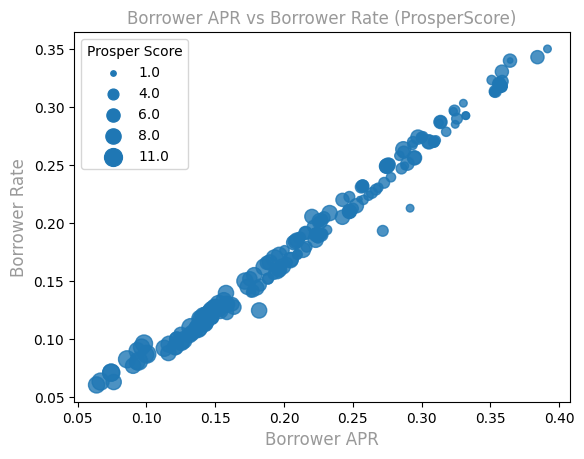

In [34]:
sb.regplot(data=loans_features_sample, x='BorrowerAPR', y='BorrowerRate', fit_reg=False,
            scatter_kws={'s': loans_features_sample['ProsperScore']*15})# Regplot of sample using seaborn
sizes = [i for i in loans_features_sample.ProsperScore.describe().loc['min':'max']]#Set sizes of the legend objects
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s*15, color=base_color))# Append legend objects to plot later
    
plt.legend(legend_obj, sizes, title='Prosper Score')# Plot and set legend title
plt.title('Borrower APR vs Borrower Rate (ProsperScore)', fontdict=font)
plt.xlabel('Borrower APR', fontdict=font)
plt.ylabel('Borrower Rate', fontdict=font);

### Observations 

#### Borrower APR vs Borrower Rate (ProsperScore)

- Higher Prosper scores are associated with lower borrower rate and borrower annual percentage rate and the lower scores are associated with higher rates.

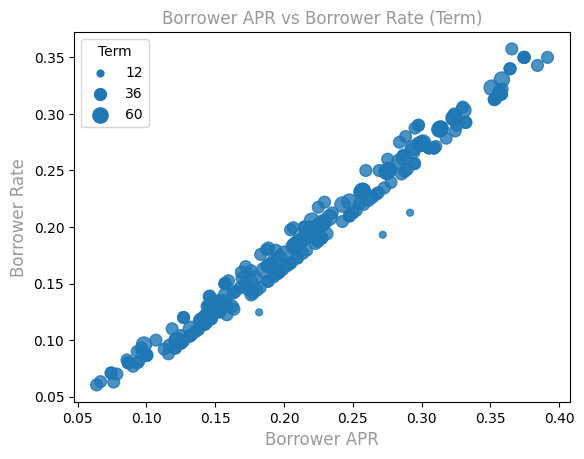

In [35]:
sb.regplot(data=loans_features_sample, x='BorrowerAPR', y='BorrowerRate', fit_reg=False,
            scatter_kws={'s': loans_features_sample['Term']*2})
sizes = [12, 36, 60]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s*2, color=base_color))
    
plt.legend(legend_obj, sizes, title='Term')
plt.title('Borrower APR vs Borrower Rate (Term)', fontdict=font)
plt.xlabel('Borrower APR', fontdict=font)
plt.ylabel('Borrower Rate', fontdict=font);

### Observations

#### Borrower APR vs Borrower Rate (Term)
- There seem to be an increase in Borrower APR and Borrower Rate as the terms increase

## Conclusions

### Univariate Exploration

- Most borrowers preffered the 36 months loan term and this might be because the borrower rate is more reasonable depending which type of borrower

### Bivariate-Exploration

- Most of the borrowers preffered by lenders are those who are Employed, those who are homeowners, with high Prosper rating and score and those who are in the hight income range, and this might be because those in these categories are less likely to default

### Multivariate-Exploration

- Whether a borrower is a homeowner or not alone does not seem to have more effect on the borrower is approved for the loan or not
- The loan amount one takes is hightly correlated to the amount they will have to pay monthly and this also applies to the rates and the term of the loan